Title: Analysis of Attributes Relating to User Knowledge Levels In a DC Machine Dataset.

Introduction:

<li> Background Information </li>

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

<li> Statement of the Question We Wish to Answer </li>
Which attributes out of the ones given, best predict user knowledge level (UNS) and how are those attributes correlated amongst themselves?
<br><br>

<li> Description of the Dataset </li>
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“very_low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



Preliminary exploratory data analysis:

In [1]:
install.packages("ggridges")
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library (tidymodels)
library(ggplot2)
library(ggridges)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ re

<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>

In [2]:
user_knowledge_data1 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data2 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 3)
user_knowledge_data1$UNS <- as.character(user_knowledge_data1$UNS)
user_knowledge_data1$UNS[user_knowledge_data1$UNS == "very_low"] <- "Very Low"

user_knowledge_data <- rbind (user_knowledge_data1,user_knowledge_data2)
user_knowledge_data


user_knowledge_data <- user_knowledge_data %>%
        mutate(UNS = as_factor(UNS))


New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,Very Low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
user_knowledge_data_selected


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,Very Low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,Very Low
0.20,0.140,0.35,0.72,0.25,Low


<li> Randomize the dataset and split it into training and testing data </li>

In [4]:
set.seed(2000)

user_knowledge_data_randomized <- slice(user_knowledge_data_selected, sample(1:n()))
user_knowledge_data_randomized

knowledge_data_split <- initial_split(user_knowledge_data_randomized, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)  


knowledge_data_training
knowledge_data_testing




STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.270,0.100,0.10,0.70,0.25,Low
0.370,0.070,0.10,0.41,0.30,Low
0.490,0.340,0.88,0.75,0.71,High
0.150,0.275,0.80,0.21,0.81,High
0.090,0.550,0.12,0.78,0.05,Low
0.680,0.610,0.34,0.31,0.23,Low
0.200,0.200,0.70,0.30,0.60,Middle
0.680,0.190,0.19,0.48,0.10,Very Low
0.430,0.450,0.27,0.27,0.89,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.270,0.100,0.10,0.70,0.25,Low
0.370,0.070,0.10,0.41,0.30,Low
0.490,0.340,0.88,0.75,0.71,High
0.090,0.550,0.12,0.78,0.05,Low
0.680,0.610,0.34,0.31,0.23,Low
0.200,0.200,0.70,0.30,0.60,Middle
0.680,0.190,0.19,0.48,0.10,Very Low
0.430,0.450,0.27,0.27,0.89,High
0.265,0.600,0.28,0.66,0.07,Very Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.150,0.275,0.80,0.21,0.81,High
0.150,0.420,0.60,0.15,0.62,Middle
0.400,0.120,0.41,0.10,0.65,Middle
0.660,0.360,0.56,0.40,0.83,High
0.060,0.770,0.72,0.19,0.56,Middle
0.310,0.200,0.46,0.78,0.83,High
0.120,0.120,0.75,0.35,0.80,High
0.230,0.700,0.19,0.51,0.45,Middle
0.330,0.040,0.50,0.55,0.10,Very Low


<li> Visualize training data </li>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



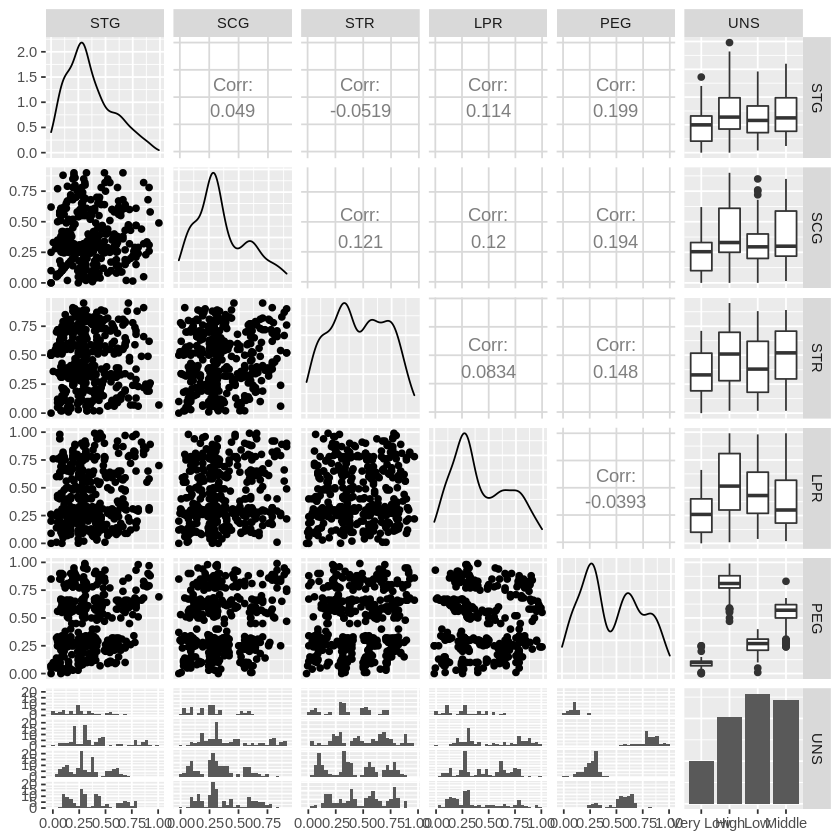

In [5]:
knowledge_plot_pairs <- user_knowledge_data_randomized %>%
  ggpairs()
knowledge_plot_pairs

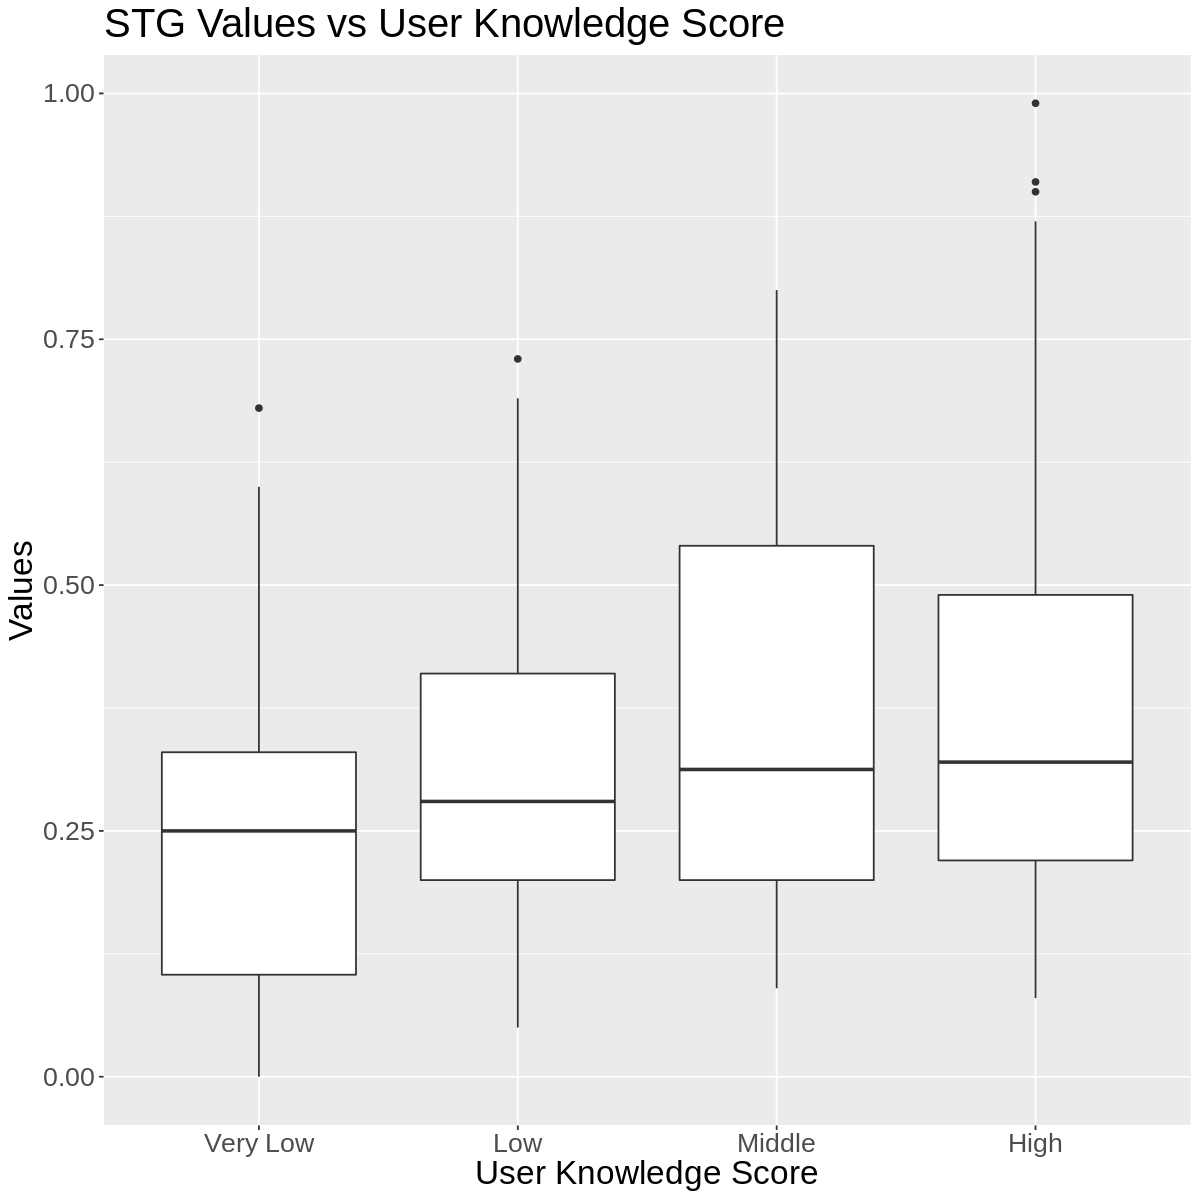

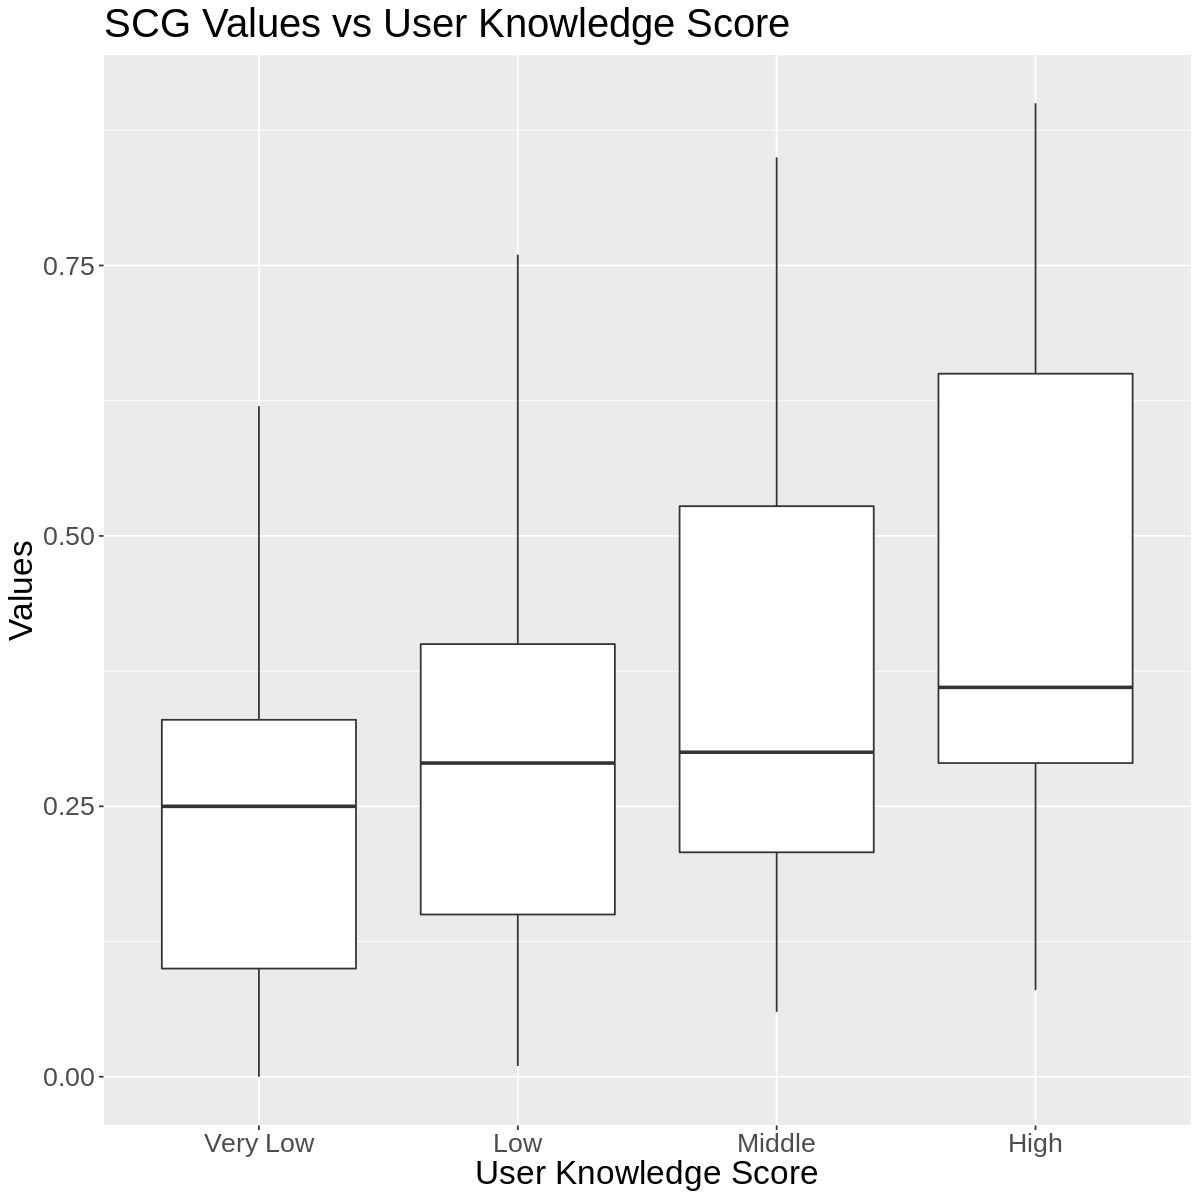

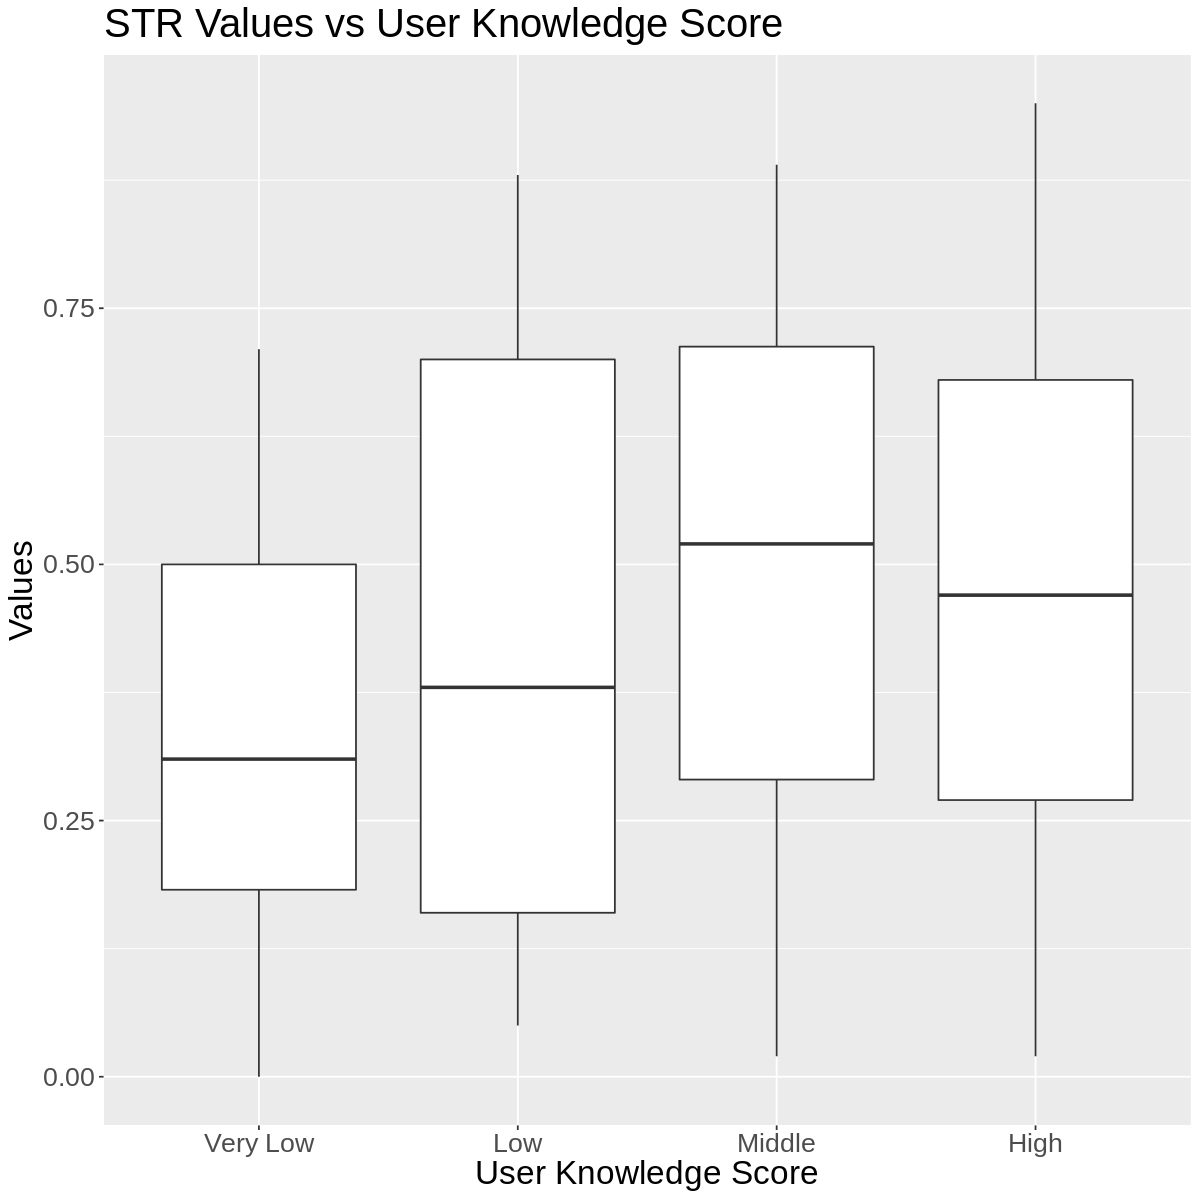

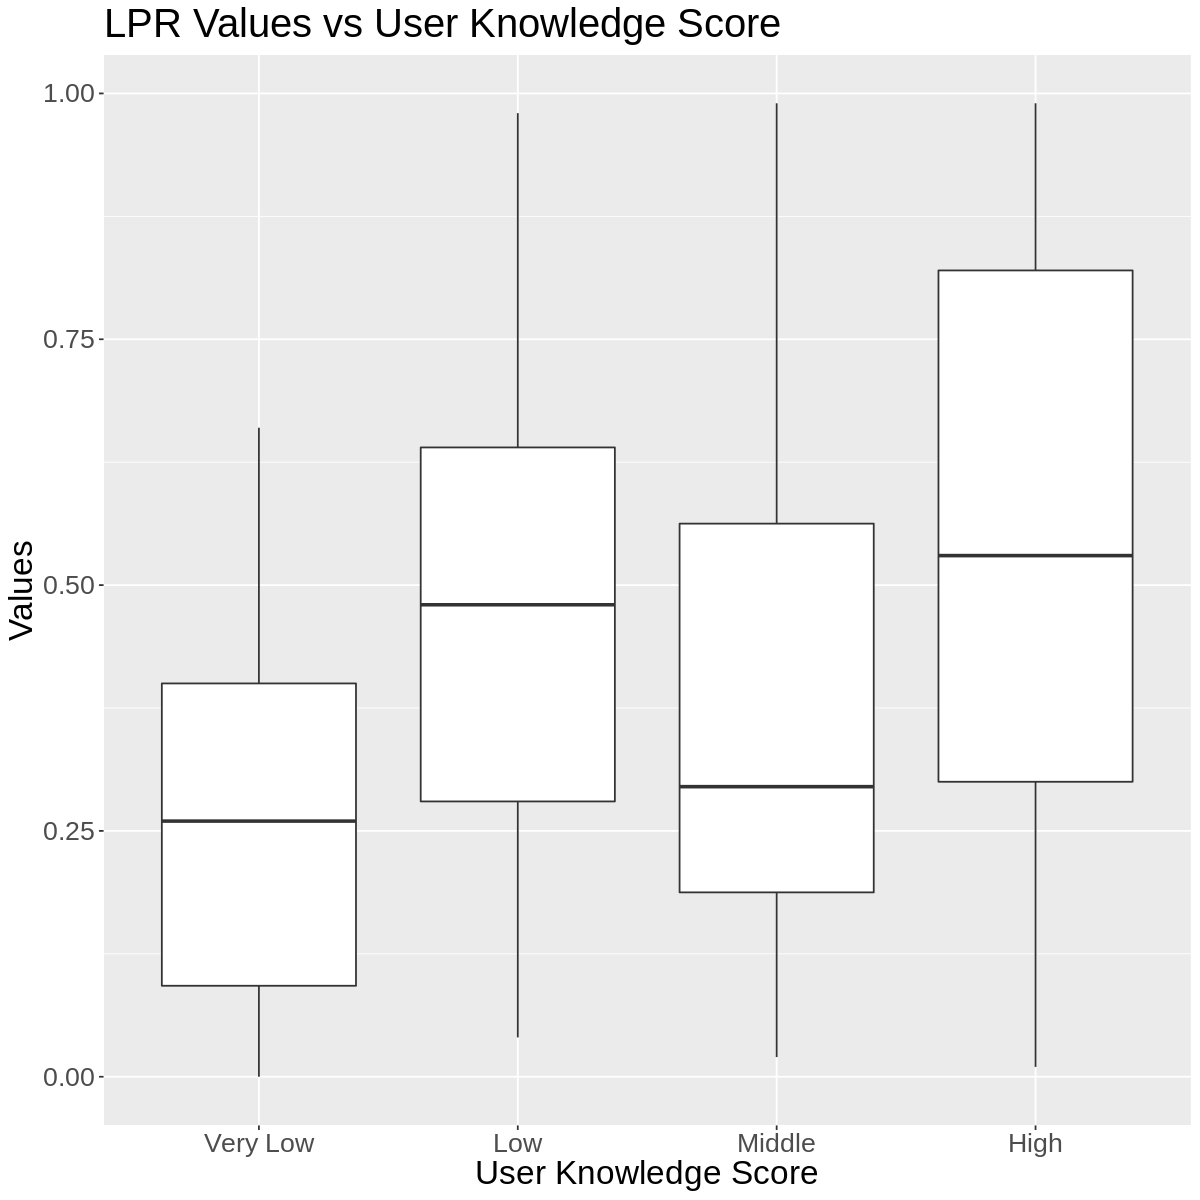

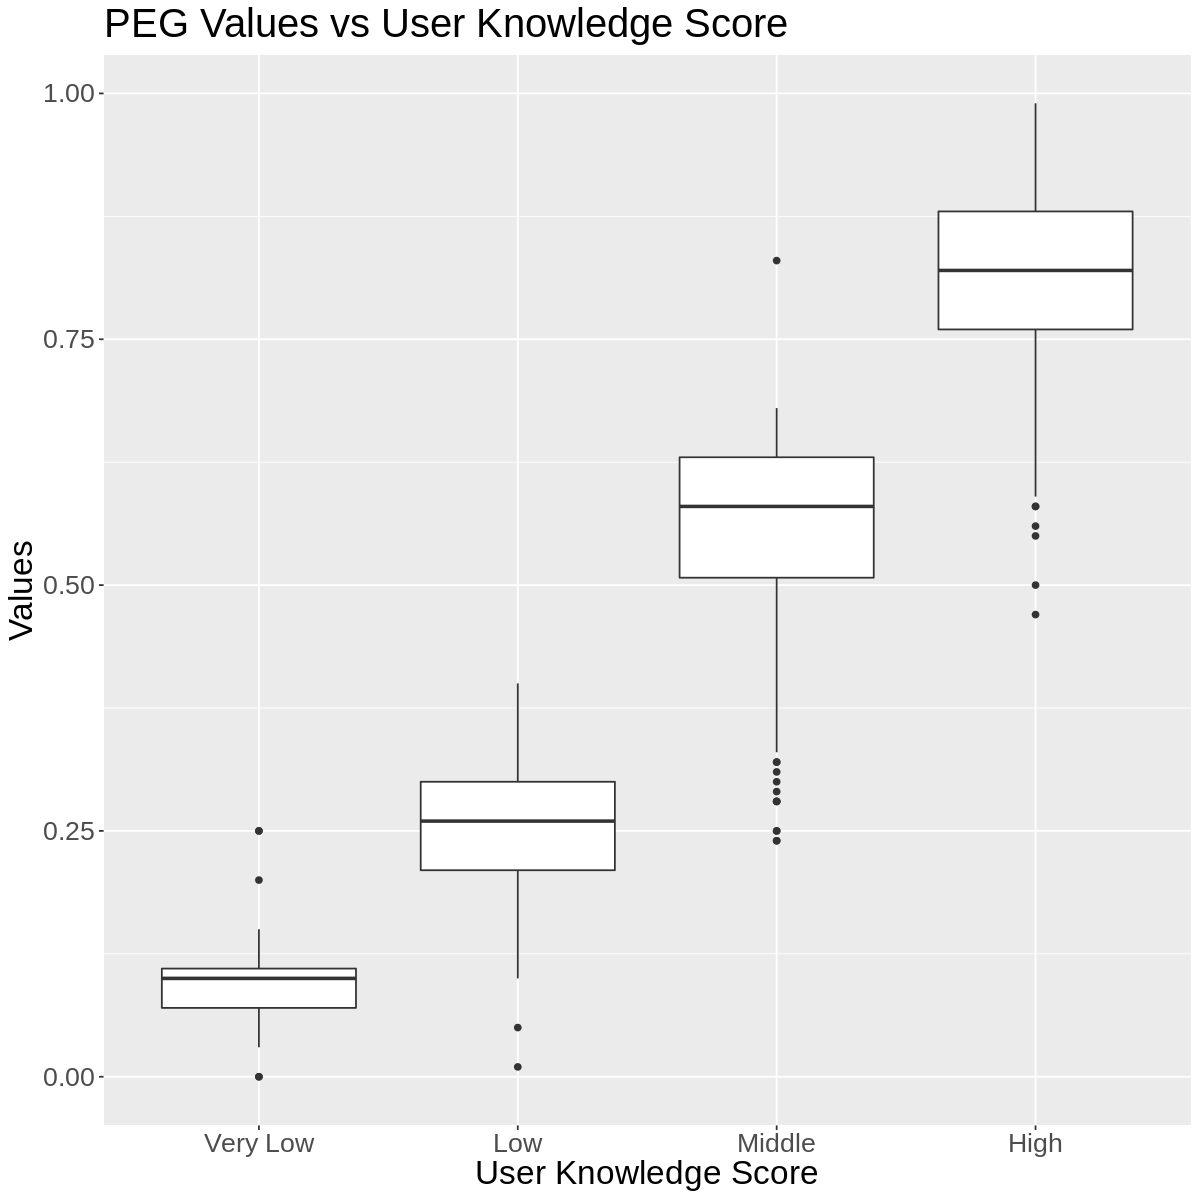

In [6]:
user_knowledge_data_STG <- knowledge_data_training %>%
select(STG, UNS)


user_knowledge_data_SCG <- knowledge_data_training %>%
select(SCG, UNS)


user_knowledge_data_STR <- knowledge_data_training %>%
select(STR, UNS)


user_knowledge_data_LPR <- knowledge_data_training %>%
select(LPR, UNS)


user_knowledge_data_PEG <- knowledge_data_training %>%
select(PEG, UNS)

options(repr.plot.height = 10, repr.plot.width = 10)

user_knowledge_data_STG$UNS <- factor(user_knowledge_data_STG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STG_box_plot <- ggplot(user_knowledge_data_STG, aes(x = UNS, y = STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "STG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STG_box_plot

user_knowledge_data_SCG$UNS <- factor(user_knowledge_data_SCG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
SCG_box_plot <- ggplot(user_knowledge_data_SCG, aes(x = UNS, y = SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "SCG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
SCG_box_plot

user_knowledge_data_STR$UNS <- factor(user_knowledge_data_STR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STR_box_plot <- ggplot(user_knowledge_data_STR, aes(x = UNS, y = STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "STR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STR_box_plot

user_knowledge_data_LPR$UNS <- factor(user_knowledge_data_LPR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
LPR_box_plot <- ggplot(user_knowledge_data_LPR, aes(x = UNS, y = LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "LPR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
LPR_box_plot

user_knowledge_data_PEG$UNS <- factor(user_knowledge_data_PEG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
PEG_box_plot <- ggplot(user_knowledge_data_PEG, aes(x = UNS, y = PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "PEG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
PEG_box_plot


    






From our boxplots, we can see the following trends in each of the predictors:
- STG: The medians for all 4 user knowledge categories are very similar, the distributions have significant overlap. This makes it difficult to distinguish between categories and thus would make not be a good predictor in our model. 
- SCG: Although the medians are very similar, the distributions have more variance and appear to have less overlap. There also seems to be monotonic increase from "Very Low" to "High" user knowledge scores, thus at this stage we may consider using this predictor in our model.  
- STR: Although the medians appear to have some variance, the distributions have significant overlap across all four UNS categories, thus rendering it unsuitable for use in classification.
- LPR: The median appears to "zig-zag" as it increases across the UNS categories, this is also reflected in the distributions. Thus we are able to distinguish certain categories such as "Very Low" to "Low" and "Medium" to "High". Thus rendering this as a good predictor for our model. 
- PEG: There is obvious and significant differentiation between the four categories, both in terms of the median and overall distribution. This makes for a very good predictor in our model. 

Picking joint bandwidth of 0.0709

Picking joint bandwidth of 0.0762



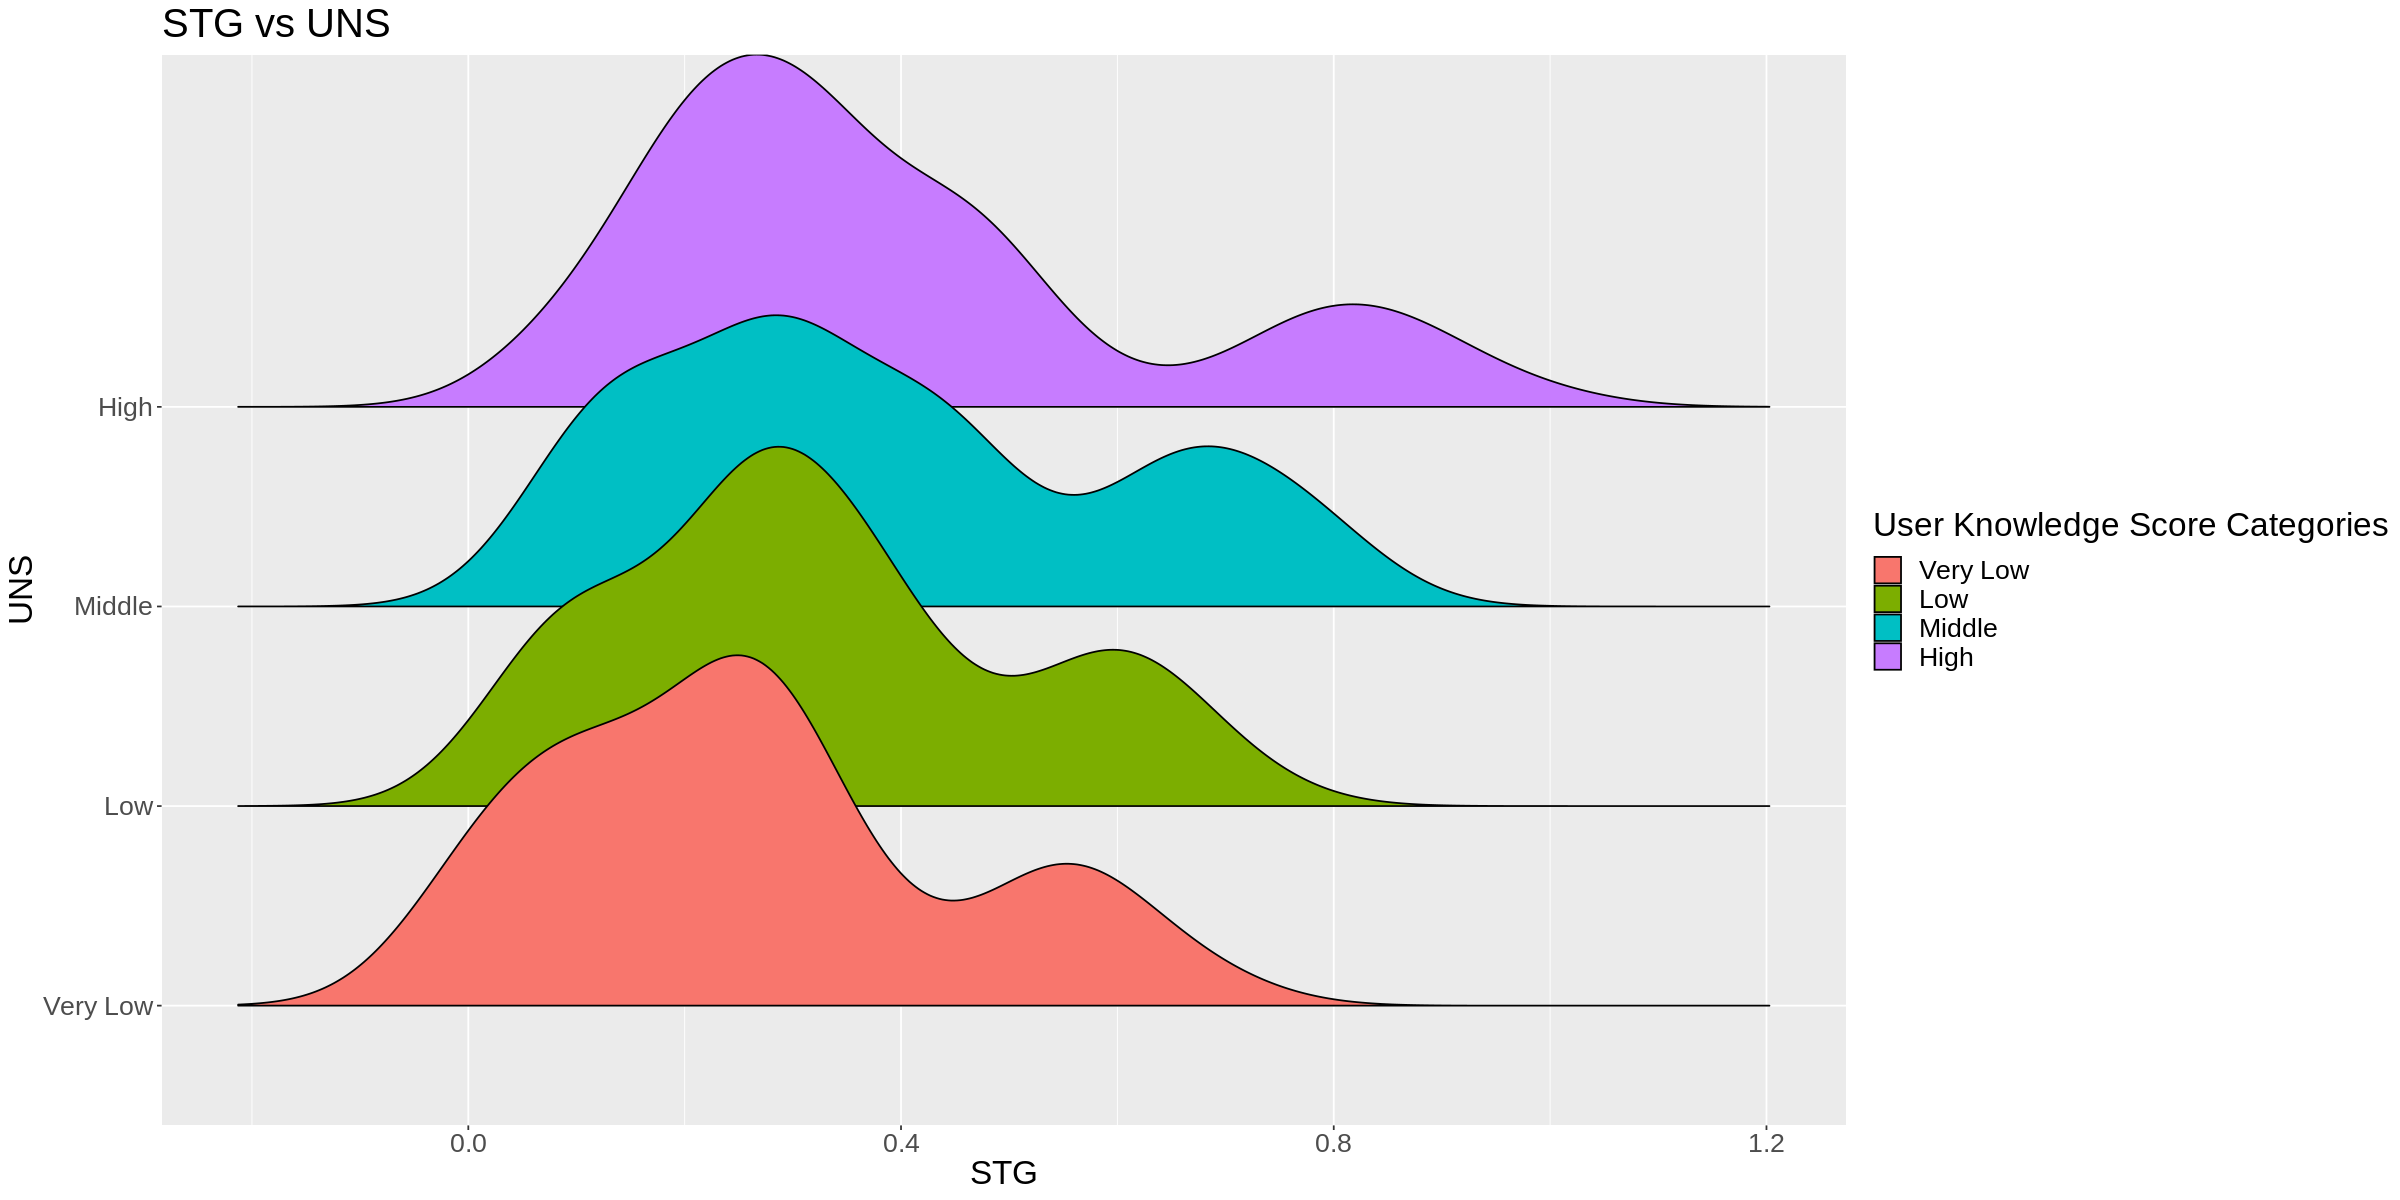

Picking joint bandwidth of 0.0923



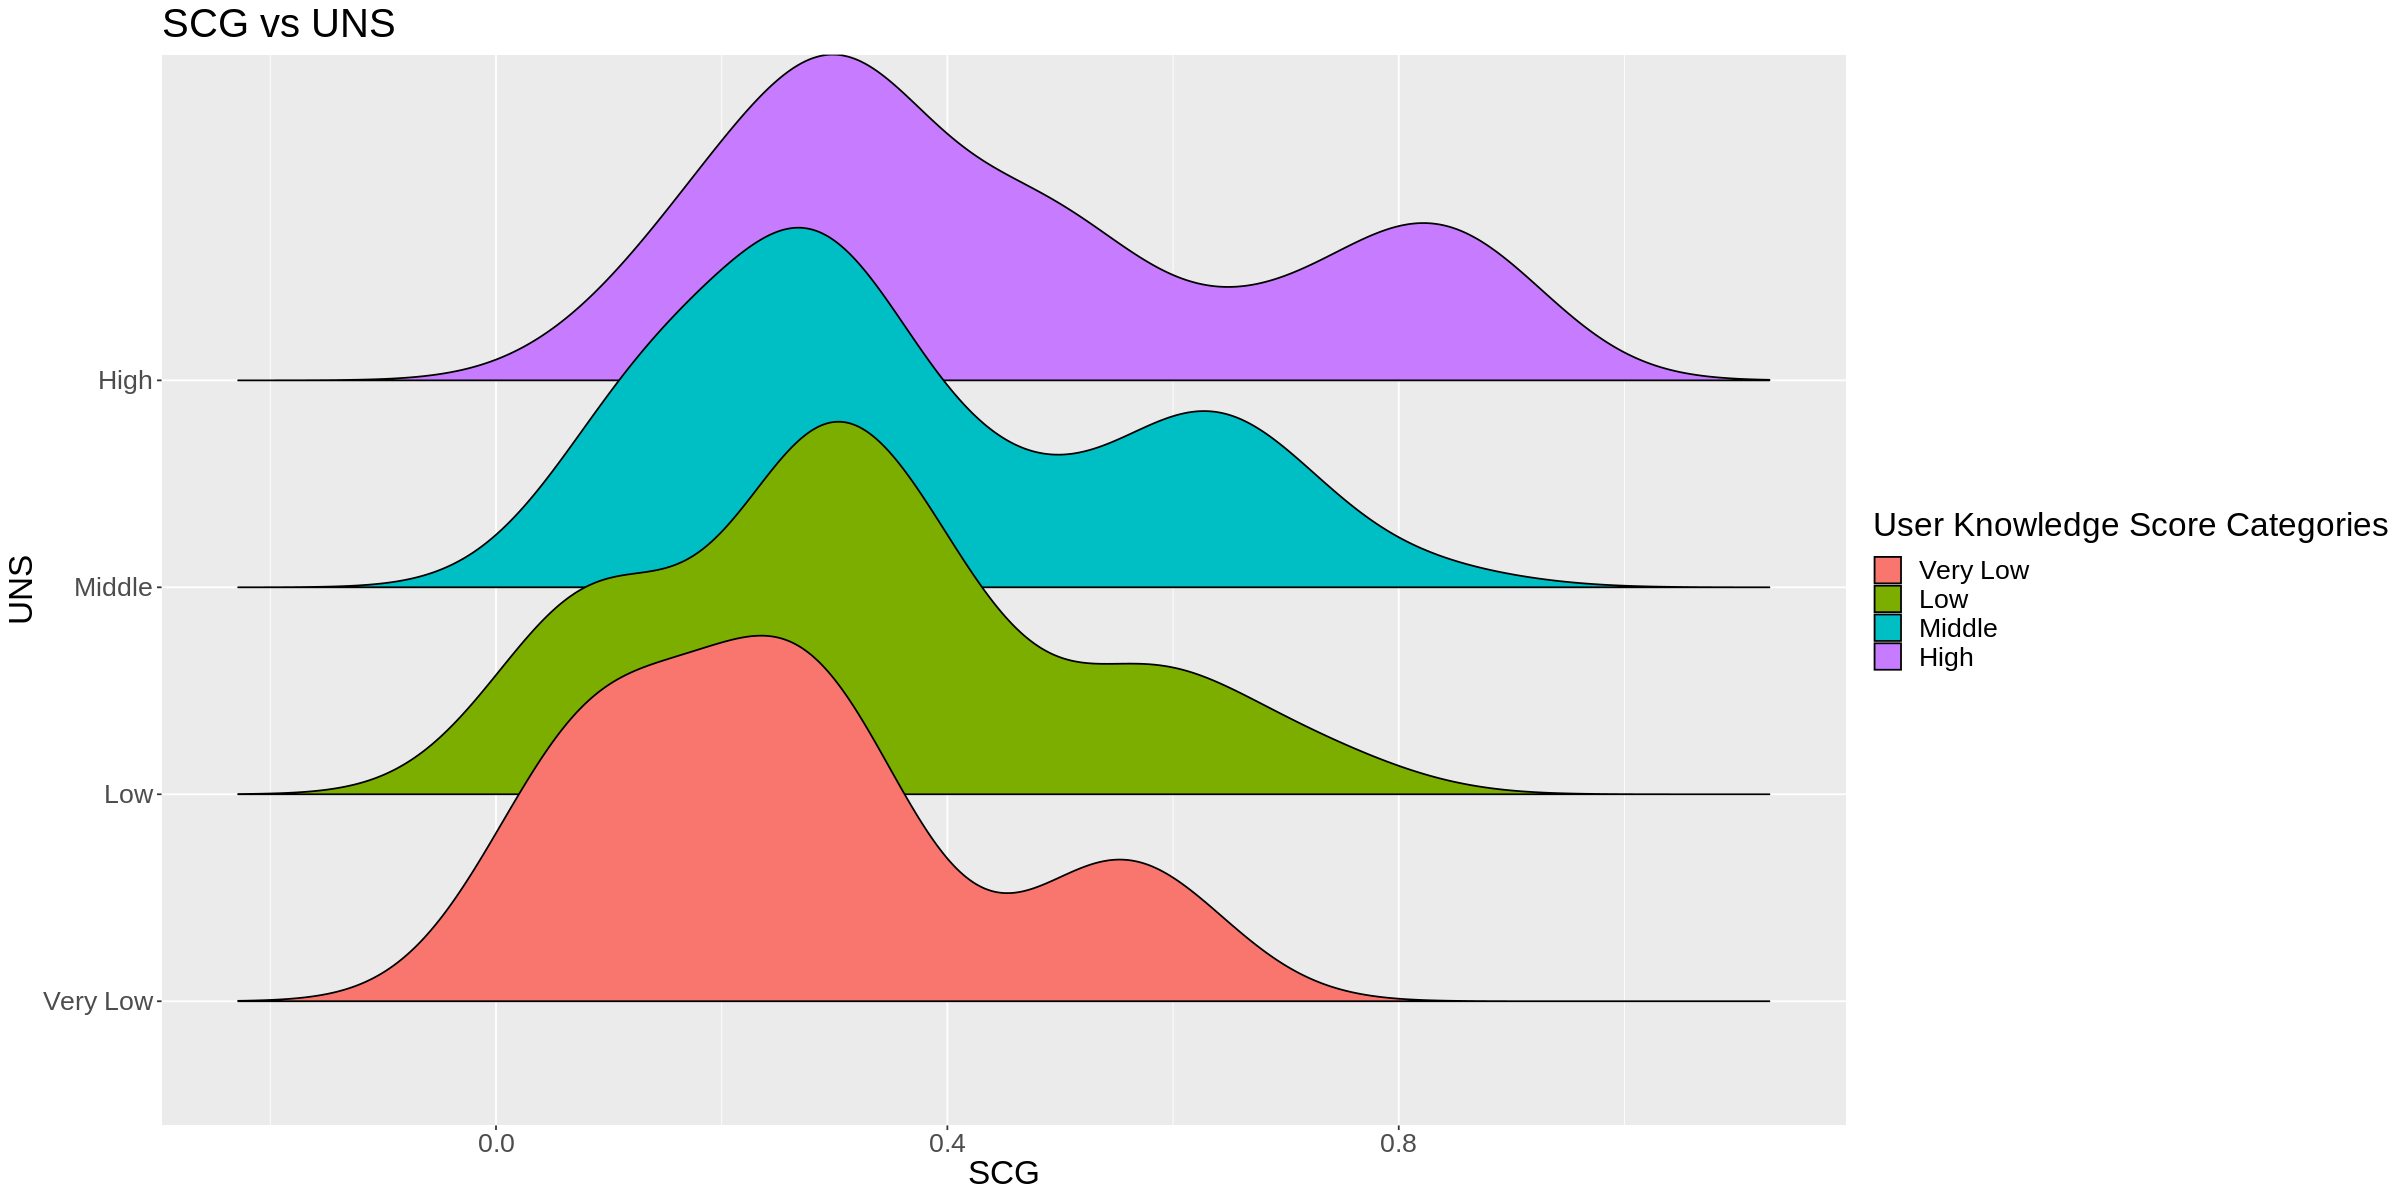

Picking joint bandwidth of 0.0916



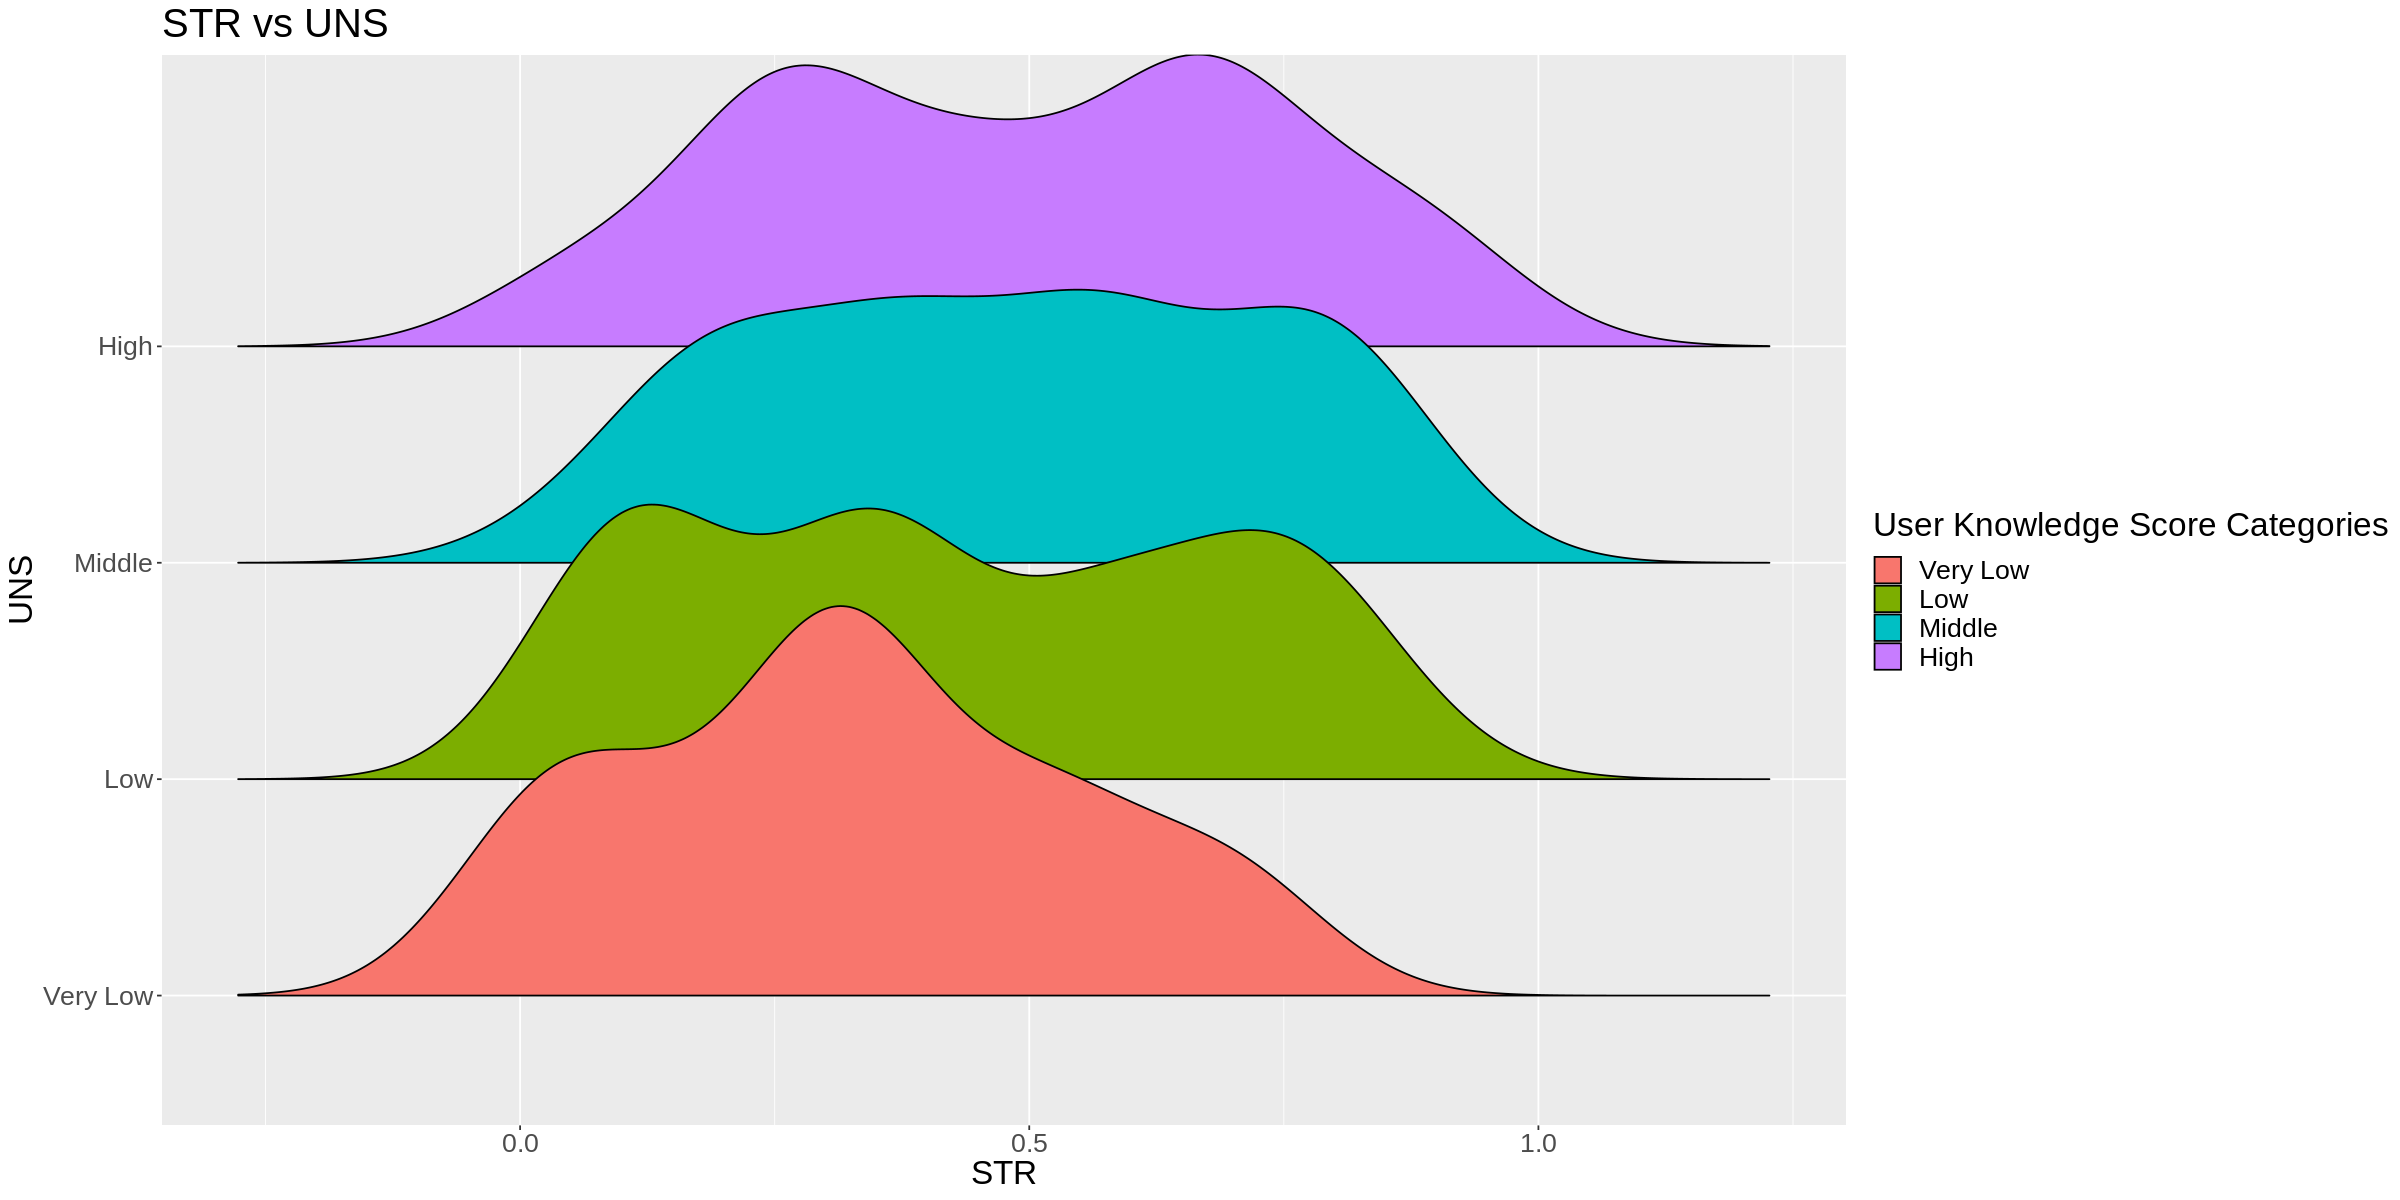

Picking joint bandwidth of 0.0261



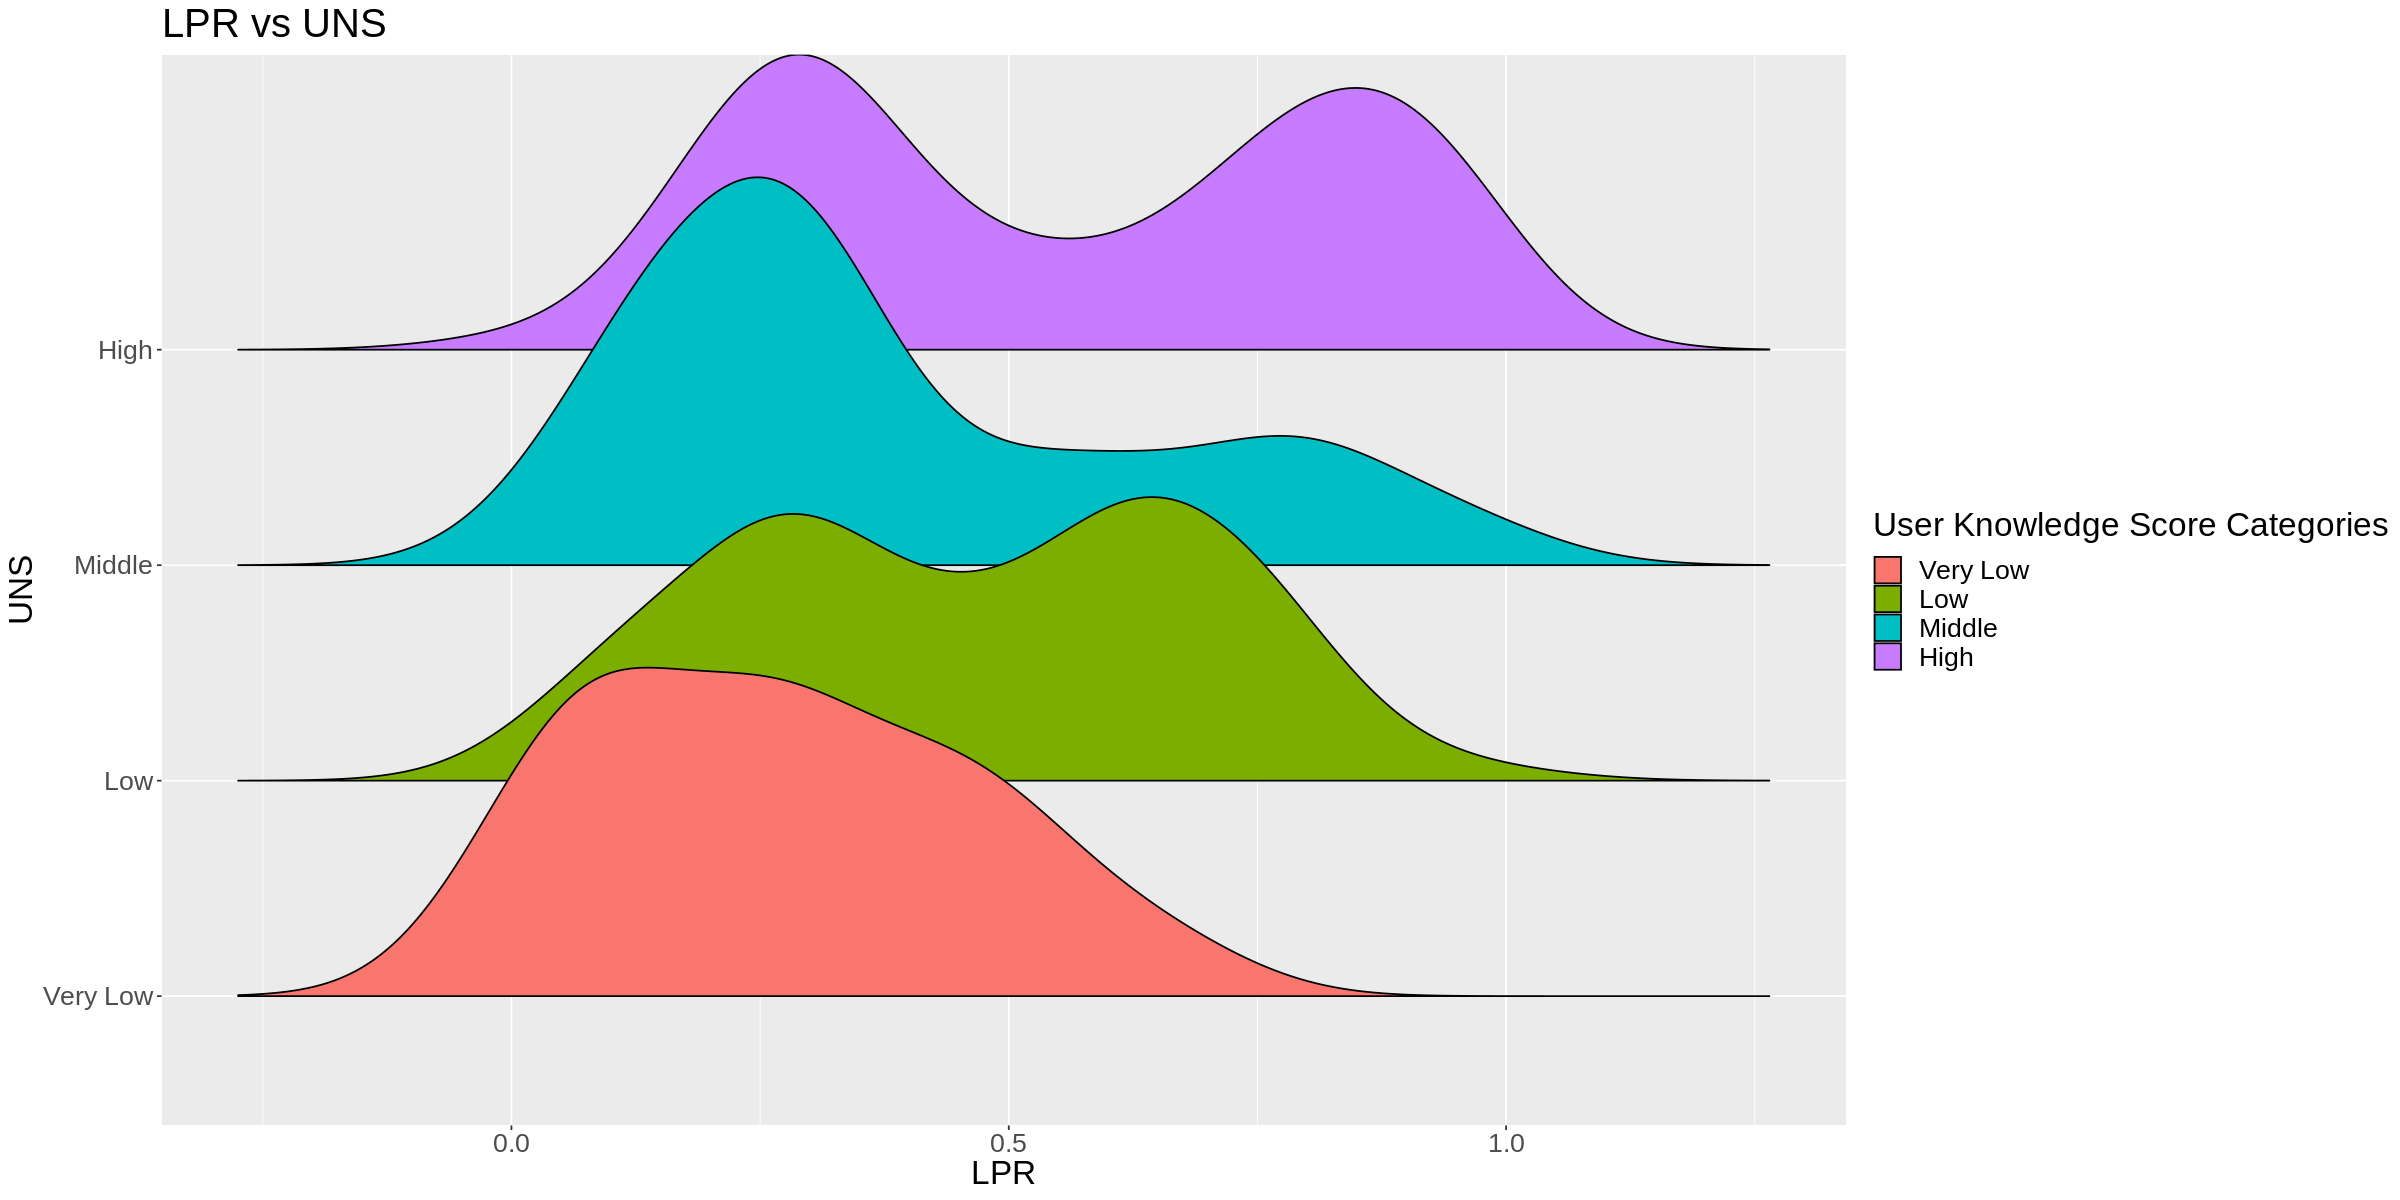

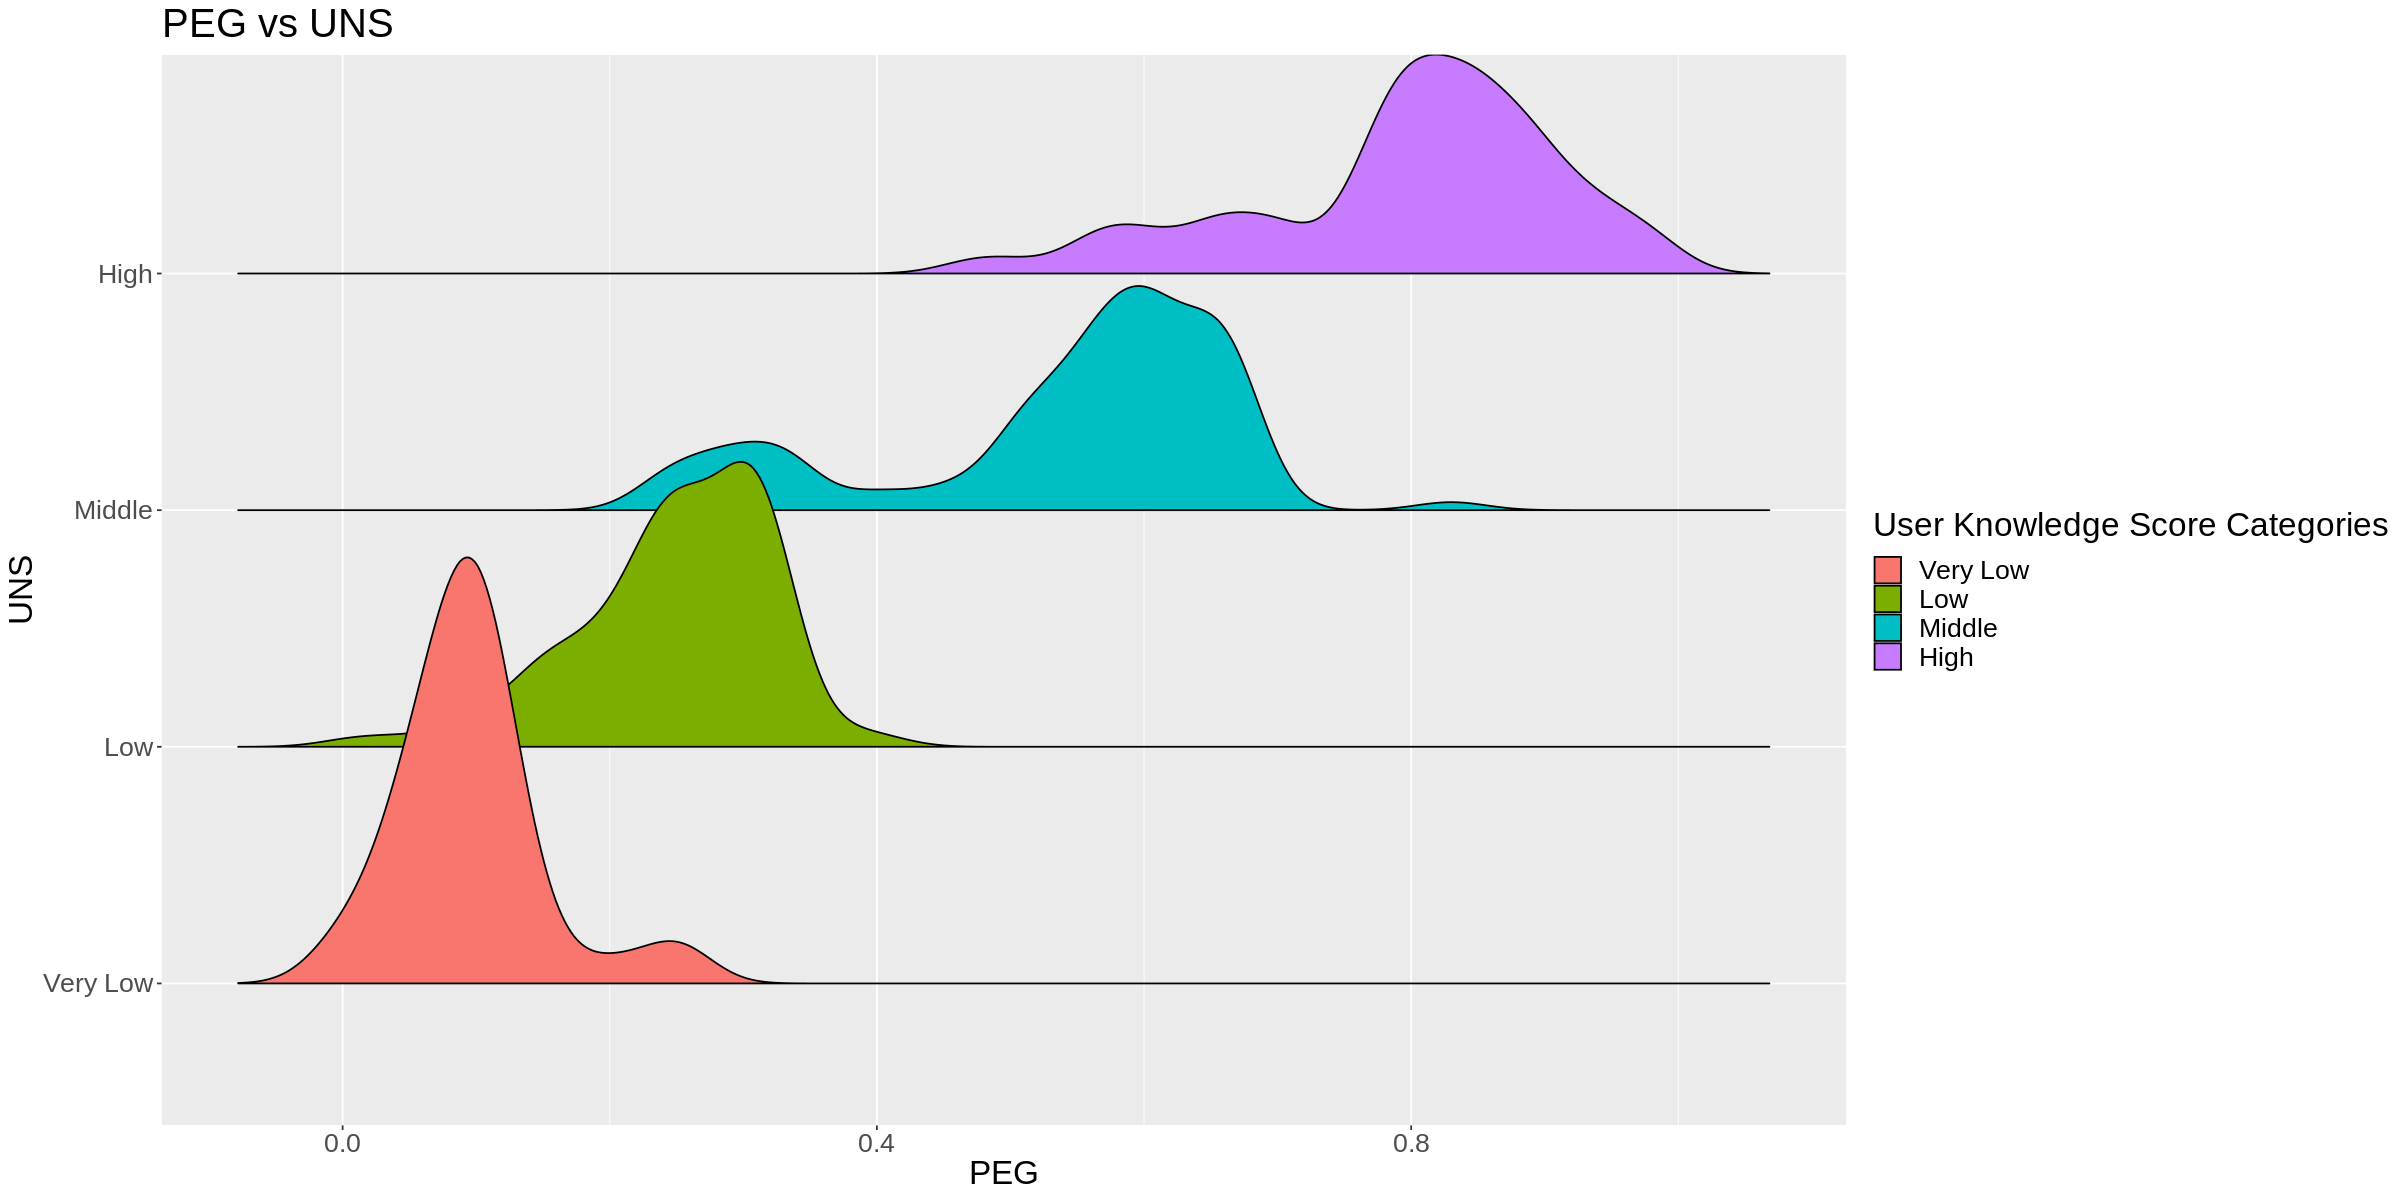

In [29]:
options(repr.plot.height = 10, repr.plot.width = 20)

ggplot(user_knowledge_data_STG, aes(x = STG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "STG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_SCG, aes(x = SCG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "SCG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_STR, aes(x = STR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "STR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_LPR, aes(x = LPR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "LPR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_PEG, aes(x = PEG, y = UNS, fill = UNS)) +
    geom_density_ridges2() +
    labs(title = "PEG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))



From our ridgeplots, we can see the following trends in each of the predictors:
- STG: We can see a rough bimodal distribution for all four UNS categories that overlap significantly, thus our initial assessment based on the boxplots of this not being a good predictor is confirmed. 
- SCG: Contrary to our assessment from the boxplots, we can see in the ggridge that this variable no longer appears to be a good predictor as it very closely resembles a similar distribution as our STG variable, thus we will not include it in our model.  
- STR: Confirmming our initial assessment, all four knowledge score distirbutions can be seen to have significant overlap in a unimodal fashion. Thus, we can exclude this predictor completely from our model.
- LPR: There appears to be irregularity in the distributions such that we are able to distinguish between certain categories such as "Very Low" to "Low" and "Medium" to "High" based on the varying probability densities under certain values. Thus confirming our initial assessment and can include this variable in our predictive model. 
- PEG: From the ggridge, we can see slight overlap in the distributions; however, there is still significant deliniation between the four categories. This confirming our intial assessment with the boxplots and making for a very good predictor in our model. 

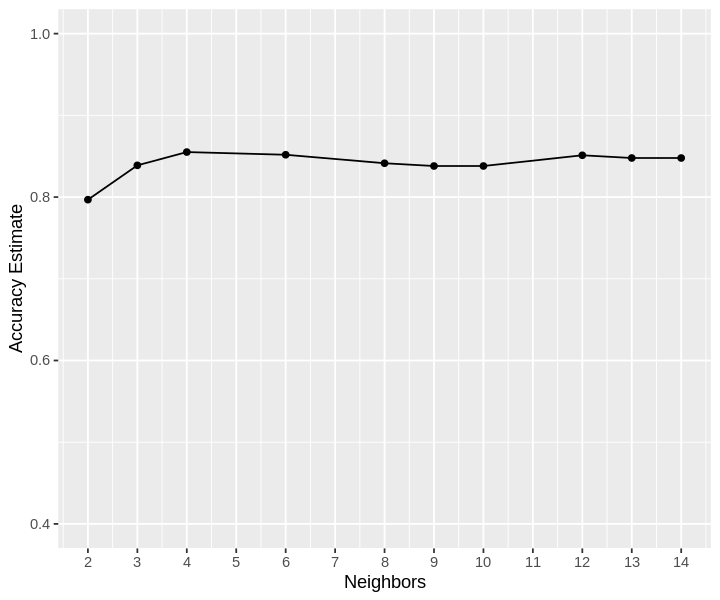

In [12]:
set.seed(2000)

peg_knowledge_recipe <- recipe(UNS ~ PEG, data = knowledge_data_training)

peg_knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

peg_knowledge_results <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_tune) %>%
       tune_grid(resamples = peg_knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 6)

peg_accuracies <- peg_knowledge_results %>% 
       filter(.metric == "accuracy")

peg_accuracies_plot <- ggplot(peg_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 

peg_accuracies_plot

From this accuracy plot, only using one variable (PEG) we can see that the optimized k (neighbor) = 4 at roughly 85% accuracy

In [13]:
set.seed(2000)

peg_knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_fit <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_spec) %>%
       fit(data = knowledge_data_testing)
peg_knowledge_fit
                                   
peg_knowledge_predictions <- predict(peg_knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
peg_knowledge_predictions

peg_knowledge_metrics <- peg_knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
peg_knowledge_metrics

peg_knowledge_conf_mat <- peg_knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
peg_knowledge_conf_mat
                         

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~4, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1717172
Best kernel: rectangular
Best k: 4

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
High,0.150,0.275,0.80,0.21,0.81,High
Middle,0.150,0.420,0.60,0.15,0.62,Middle
Middle,0.400,0.120,0.41,0.10,0.65,Middle
High,0.660,0.360,0.56,0.40,0.83,High
Middle,0.060,0.770,0.72,0.19,0.56,Middle
High,0.310,0.200,0.46,0.78,0.83,High
High,0.120,0.120,0.75,0.35,0.80,High
Middle,0.230,0.700,0.19,0.51,0.45,Middle
Very Low,0.330,0.040,0.50,0.55,0.10,Very Low


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8686869
kap,multiclass,0.8194951


          Truth
Prediction Very Low High Low Middle
  Very Low       10    0   3      0
  High            0   23   0      0
  Low             2    0  23      0
  Middle          0    2   6     30

From fiting our model with using k (neighbors) = 4 and only using PEG as our predictor. Our predictions (classifier) garner a 87% accuracy

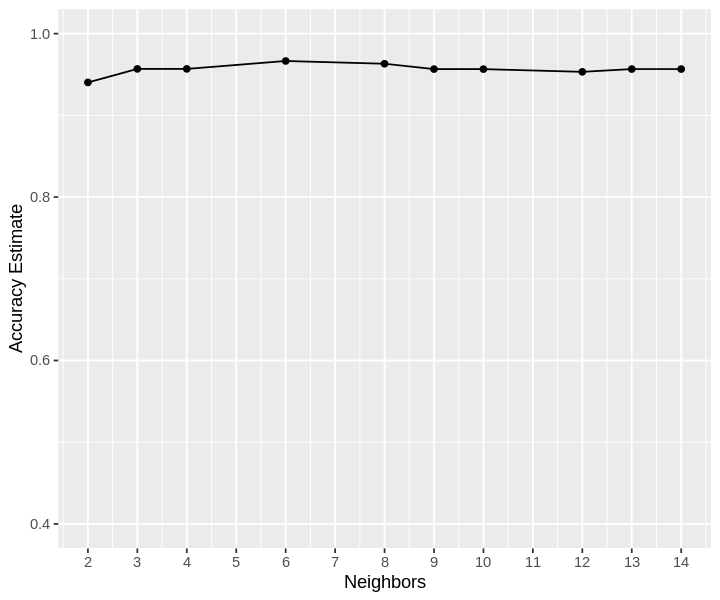

In [15]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

knowledge_results <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_tune) %>%
       tune_grid(resamples = knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 6)

accuracies <- knowledge_results %>% 
       filter(.metric == "accuracy")

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 

accuracies_plot

From this accuracy plot, using two predictors (PEG and LPR) we can see that the optimized k (neighbors) = 6 at roughly 97% accuracy

In [16]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_fit <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_spec) %>%
       fit(data = knowledge_data_testing)
knowledge_fit
                                   
knowledge_predictions <- predict(knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
knowledge_predictions

knowledge_metrics <- knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
knowledge_metrics

knowledge_conf_mat <- knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
knowledge_conf_mat
                                   
                                   

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~6, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1212121
Best kernel: rectangular
Best k: 6

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
High,0.150,0.275,0.80,0.21,0.81,High
Middle,0.150,0.420,0.60,0.15,0.62,Middle
Middle,0.400,0.120,0.41,0.10,0.65,Middle
High,0.660,0.360,0.56,0.40,0.83,High
Middle,0.060,0.770,0.72,0.19,0.56,Middle
High,0.310,0.200,0.46,0.78,0.83,High
High,0.120,0.120,0.75,0.35,0.80,High
Middle,0.230,0.700,0.19,0.51,0.45,Middle
Low,0.330,0.040,0.50,0.55,0.10,Very Low


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9494949
kap,multiclass,0.9298370


          Truth
Prediction Very Low High Low Middle
  Very Low        9    0   0      0
  High            0   25   0      1
  Low             3    0  31      0
  Middle          0    0   1     29

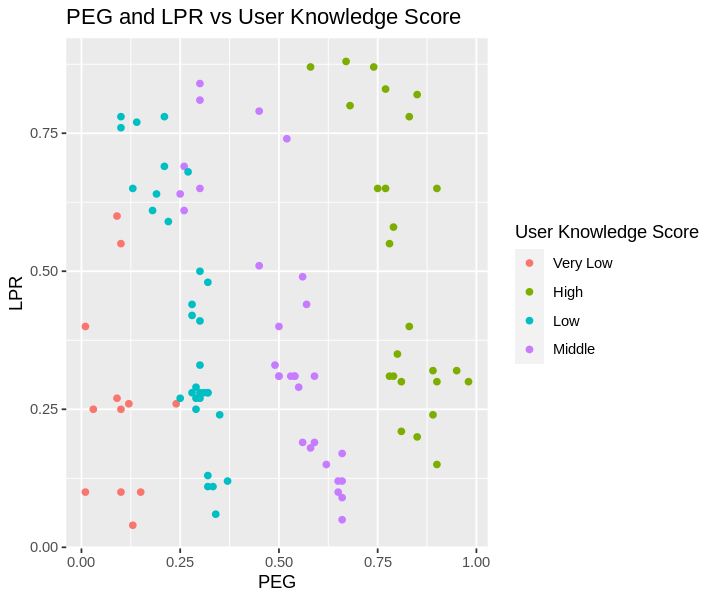

In [21]:
knowledge_prediction_plot <- ggplot(knowledge_predictions, aes(x = PEG, y = LPR, colour = UNS)) +
    geom_point() +
    labs(x = "PEG", y = "LPR", colour = "User Knowledge Score", title = "PEG and LPR vs User Knowledge Score")
knowledge_prediction_plot


From fiting our model with k (neighbors) = 6 and using PEG and LPR instead of just PEG as our predictor. Our classifier increased from a 87% to a 95% accuracy

When using only PEG as our predictor, we saw a k value of 3 to be optimal from the accuracy plot and obtained a prediction accuracy of 87%. This agrees with our initial assessment of PEG being an excellent predictor due to the clear deliniation between UNS categories. 

When adding LPR as a predictor in addition to PEG, we saw many similar k values ranging from 3 to 14, but came to the conclusion that 6 offered the highest accuracy. From this we obtained a prediction accuracy of 95%, an increase of 8% from our original model which only used PEG. Thus, LPR was able to better allow our model to differentiate between categories. 

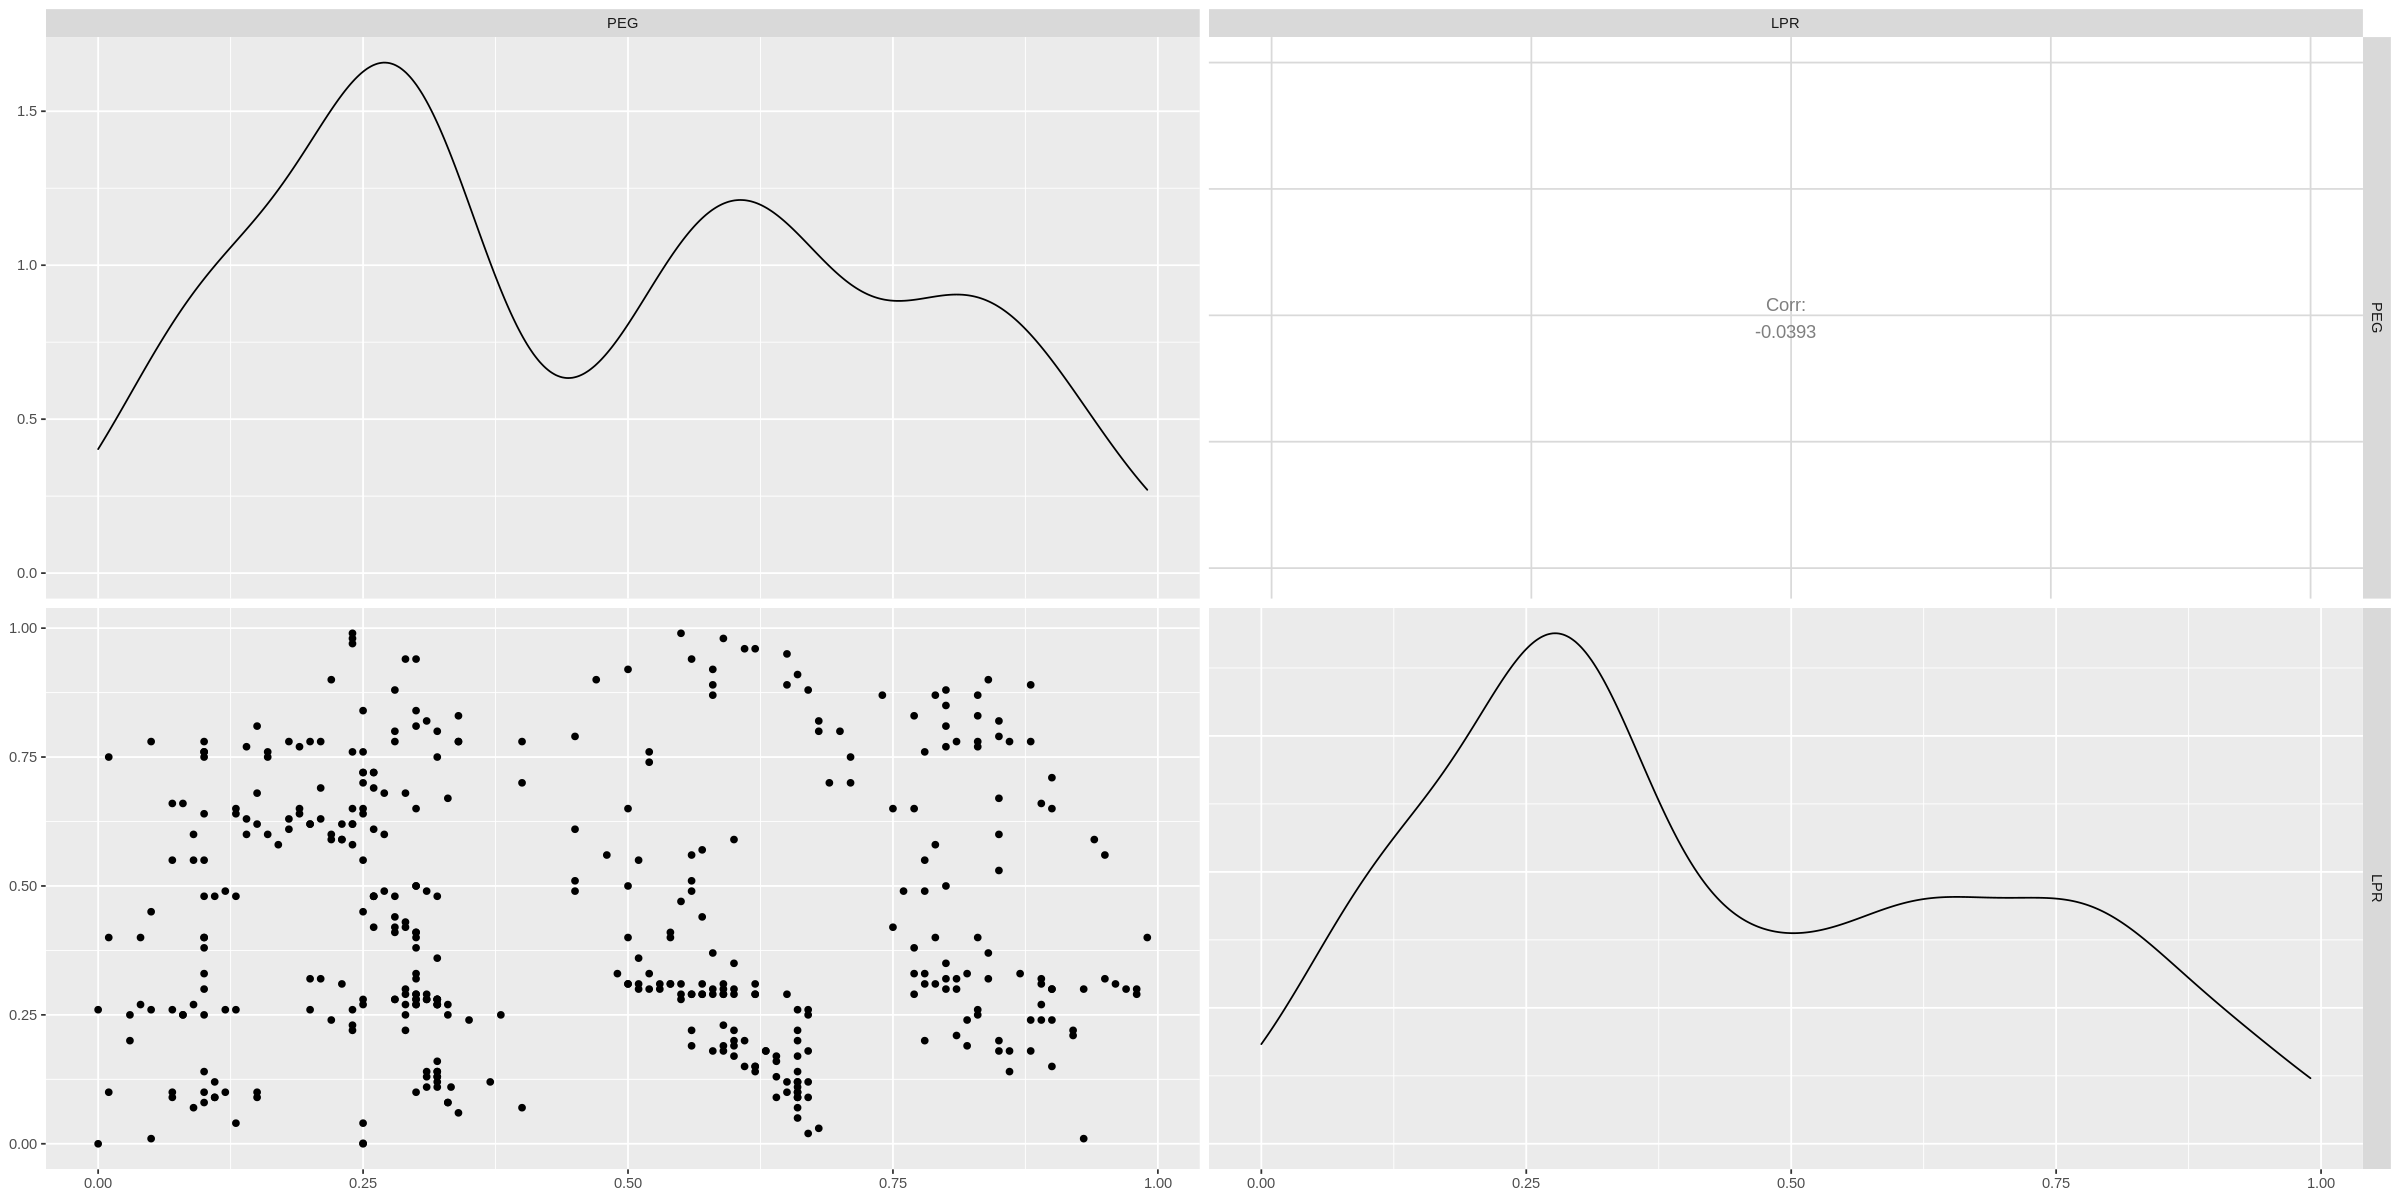

In [30]:
predictor_plot_pairs <- user_knowledge_data_randomized %>%
  select(PEG, LPR) %>%
  ggpairs()
predictor_plot_pairs

Methods: 

<li> Explain how you will conduct either your data analysis and which variables/columns you will use </li>
2 grouped bar plots will be created, user_knowledge_g1_plot for STG, SCG, STR and user_knowledge_g2_plot for LPR and PEG graphs. This is because the two groups use a different scale between them, with the sum of the column values on the y-axis and the 4 groups of knowledge levels of users (UNS) on the x-axis. Each colored bar corresponds with the sum of a category's value for the given knowledge level. The bar heights of the attributes within the high and middle knowledge level categories will be compared to visually evaluate and select for 1 attribute from each group (1 from STG, SCG, and STR, and 1 from LPR and PEG) that appears most closely linked to the two chosen knowledge levels, in the form of having the highest column heights in those two categories. 
<br><br>


<li> Describe at least one way that you will visualize the results </li>
A scatter plot to compare these two identified attributes will be made and the correlation strength and direction will be visually evaluated. 




Discussion:

- Summarize findings:

<br><br>References: 

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe